In [1]:
%matplotlib widget

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [3]:
from pysketcher import *

In [4]:
from ipywidgets import FloatSlider, AppLayout, Label, HBox, Button, Output

In [5]:
from IPython.display import HTML, SVG, display, clear_output

In [6]:
from math import tan, radians, sin, cos

In [7]:
myfig={}

In [8]:
gw = """\
libraries: ["from math import tan, radians, sin, cos","from pysketcher import *"]
fontsize: 18
g: 9.81              # constant gravity
theta: 30.0          # inclined plane angle
L: 10.0              # sketch sizing parameter
a: 1.0               #
xmin: 0.0            # sketech min Abscissa
ymin: -3.0           # sketech min Ordinate     
rl: 2.0              # rectangle width
rL: 1.0              # rectangle length
setframe:            # sketch setup
    action: "drawing_tool.set_coordinate_system(xmin=xmin, xmax=xmin+1.5*L,ymin=ymin, ymax=ymin+1.5*L,instruction_file='tmp_mpl_friction.py')"
setblackline:        # default frame values and actions
    action: "drawing_tool.set_linecolor('black')"
B: point(a+L,0)                      # wall right end
A: point(a,tan(radians(theta))*L)    # wall left end
normal_vec: point(sin(radians(theta)),cos(radians(theta)))     # Vector normal to wall
tangent_vec: point(cos(radians(theta)),-sin(radians(theta)))   # Vector tangent to wall
help_line: Line(A,B)                 # wall line
x: a + 3*L/10.
y: help_line(x=x)    
contact: point(x, y)    
c: contact + rL/2*normal_vec
rectangle: 
    formula: Rectangle(contact, rl, rL)
    style:
        linecolor: blue
        filled_curves: blue
    transform: ["rotate(-theta, contact)","translate(-rl/2*tangent_vec)"]
N: 
    formula: Force(contact - rl*normal_vec, contact, r'$N$', text_pos='start')
    style:
        linecolor: black
mg: 
    formula: Gravity(c, rl, text='$Mg$')
    style:
        linecolor: black
wheel: 
    formula: "Composition({'outer': rectangle})"   
    style:
        shadow: 1
body: 
    formula: "Composition({'wheel': wheel, 'N': N, 'mg': mg})"
    style:
        linecolor: black
mB:
    formula: Text(r'$B$',B)
mA:
    formula: Text(r'$A$', A)
wall: 
    formula: Wall(x=[A[0], B[0]], y=[A[1], B[1]], thickness=-0.25,transparent=False)
    style:
        linecolor: black    
angle: 
    formula: "Arc_wText(r'$<bslash>theta$', center=B, radius=3, start_angle=180-theta, arc_angle=theta, fontsize=fontsize)"
    style:
        linecolor: black
        linewidth: 1
ground: 
     formula: Line((B[0]-L/10., 0), (B[0]-L/2.,0))
     stlye:
         linecolor: black
         linestyle: dashed
         linewidth: 1
x_const: 
    formula: Line(contact, contact + point(0,4))
    style:
        linestyle: dotted
    transform: rotate(-theta, contact)
x_axis: 
    formula: "Axis(start=contact+ 2*rl*normal_vec, length=2*rl,label='$x$', rotation_angle=-theta)"
plan: 
    formula: "Composition({'body': body, 'angle': angle, 'inclined wall': wall, 'x start': x_const, 'x axis': x_axis, 'mA': mA, 'mB': mB})"
friction: 
    formula: "Composition({'plan': plan, 'ground': ground})"
"""

In [9]:
sketchParse(gw,myfig)

In [10]:
d = myfig['friction'].draw()

In [11]:
drawing_tool.display()

In [12]:
angle = myfig['theta']
def doright(change):
    global angle
    rotate(-5)
    angle += 5
def doleft(change):
    global angle
    rotate(5)
    angle -= 5
def rotate(theta):
    global angle
    drawing_tool.erase()
    myfig['plan']['angle'].changeAngles(180-angle,angle)
    myfig['plan'].rotate(theta,myfig['B'])
    myfig['friction'].draw()

In [13]:
left = Button(
    description = '',
    icon = 'rotate-left',
)
left.on_click(doleft)
right = Button(
    description = '',
    icon = 'rotate-right',
)
right.on_click(doright)
output = Output()

In [14]:
applayout = AppLayout(
    center=output,
    footer=HBox([left,right]),
    pane_heights=[0, 6, 1]
)
#drawing_tool.mpl.ion()

In [15]:
applayout

AppLayout(children=(HBox(children=(Button(icon='rotate-left', style=ButtonStyle()), Button(icon='rotate-right'…

In [16]:
with output:
    clear_output()
    display(drawing_tool.mpl.gcf().canvas)

In [17]:
drawing_tool.mpl.ion()

In [18]:
import time

In [19]:
for i in range(0,5):
    doright(None)
    with output:
        clear_output(wait=True)
        display(drawing_tool.mpl.gcf().canvas)
    time.sleep(1)

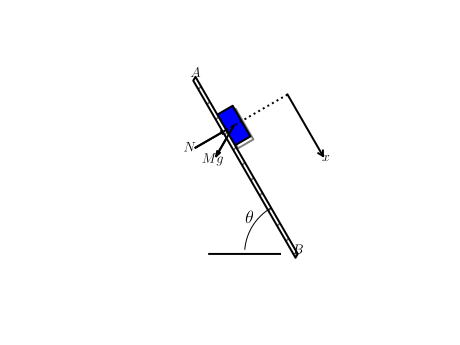

In [20]:
for i in range(0,10):
    doright(None)
    clear_output(wait=True)
    display(SVG(sketch2SVG()))
    time.sleep(0.01)

In [21]:
drawing_tool.mpl

<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [22]:
myfig['friction'].graphviz_dot('friction')

graphviz [('Composition:\\nfriction', 'Composition:\\nplan'), ('Composition:\\nplan', 'Composition:\\nbody'), ('Composition:\\nbody', 'Composition:\\nwheel'), ('Composition:\\nwheel', 'Rectangle:\\nouter'), ('Rectangle:\\nouter', 'Curve:\\nrectangle'), ('Composition:\\nbody', 'Force:\\nN'), ('Force:\\nN', 'Line:\\narrow'), ('Line:\\narrow', 'Curve:\\nline'), ('Force:\\nN', 'Text:\\ntext'), ('Composition:\\nbody', 'Gravity:\\nmg'), ('Gravity:\\nmg', 'Line:\\narrow'), ('Line:\\narrow', 'Curve:\\nline'), ('Gravity:\\nmg', 'Text:\\ntext'), ('Composition:\\nplan', 'Arc_wText:\\nangle'), ('Arc_wText:\\nangle', 'Arc:\\narc'), ('Arc:\\narc', 'Curve:\\narc'), ('Arc_wText:\\nangle', 'Text:\\ntext'), ('Composition:\\nplan', 'Wall:\\ninclined wall'), ('Wall:\\ninclined wall', 'Curve:\\nwall'), ('Composition:\\nplan', 'Line:\\nx start'), ('Line:\\nx start', 'Curve:\\nline'), ('Composition:\\nplan', 'Axis:\\nx axis'), ('Axis:\\nx axis', 'Arrow3:\\narrow'), ('Arrow3:\\narrow', 'Line:\\nline'), ('Line

In [23]:
!dot -Tpng -o friction.png friction.dot

![](friction.png)

In [24]:
drawing_tool.mpl.gcf().canvas.print_png("friction.png")

![](friction.png)

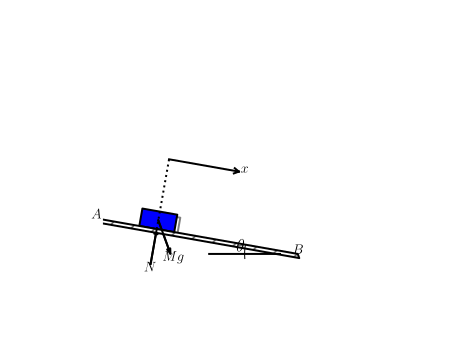

In [25]:
display(SVG(sketch2SVG()))

In [26]:
gcf = drawing_tool.mpl.gcf()

In [27]:
gcf.canvas

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
from io import BytesIO
from PIL import Image
def sketch2PNG():
    f = BytesIO()
    drawing_tool.mpl.gcf().canvas.print_png(f)
    img = Image.open(f)
    return img

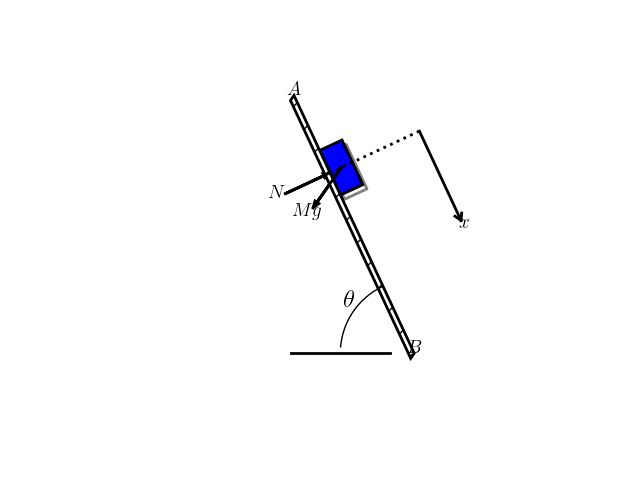

In [31]:
for i in range(0,10):
    doright(None)
    clear_output(wait=True)
    display(sketch2PNG()) 
    time.sleep(0.01)